In [1]:
import warnings

warnings.simplefilter("ignore")
def warn(*args, **kwargs):
    pass

warnings.warn = warn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import pandas_profiling

In [2]:
df = pd.read_csv('/Volumes/Data/eleicoes/unbalanced/report/CNN_validation_report.csv',
                sep=';')
df2 = pd.read_csv('/Volumes/Data/eleicoes/report/CNN_validation_report.csv',
                sep=';')

In [3]:
pandas_profiling.ProfileReport(df)

Number of variables,20
Number of observations,15
Total Missing (%),0.0%
Total size in memory,2.4 KiB
Average record size in memory,165.3 B
Numeric,3
Categorical,0
Boolean,0
Date,0
Text (Unique),2
Rejected,15


In [4]:
df.head()

,model,source,accuracy,p_nonpol,p_pol,r_nonpol,r_pol,f1_nonpol,f1_pol,s_nonpol,s_pol,f1_macro,r_macro,p_macro,mean_auc,std_auc,ff1,recall,precision,time
0,CNN,S2,0.887606,0.889417,0.884279,0.933833,0.813253,0.911084,0.847280,801,498,0.879182,0.873543,0.886848,0.949854,0.023082,0.886623,0.887606,0.887448,2018-09-23T21:49:42.508981
1,CNN,S1,0.832179,0.802073,0.919162,0.966292,0.616466,0.876557,0.737981,801,498,0.807269,0.791379,0.860617,0.878906,0.041584,0.823431,0.832179,0.846961,2018-09-23T22:05:44.613537
2,CNN,S3,0.765204,0.787037,0.721839,0.848939,0.630522,0.816817,0.673098,801,498,0.744957,0.739730,0.754438,0.840532,0.024013,0.761719,0.765204,0.762042,2018-09-23T22:17:39.708018
3,CNN,S4,0.933795,0.937576,0.927386,0.956305,0.897590,0.946848,0.912245,801,498,0.929546,0.926947,0.932481,0.975394,0.016204,0.933582,0.933795,0.933670,2018-09-23T22:43:07.042523
4,CNN,S1 S2,0.857583,0.846067,0.882641,0.940075,0.724900,0.890597,0.796031,801,498,0.843314,0.832487,0.864354,0.921013,0.030650,0.854343,0.857583,0.860089,2018-09-23T22:58:36.618710


In [5]:
#for c in df:
 #   unique = df[c].unique()
  #  print('>>>', c, len(unique), unique)

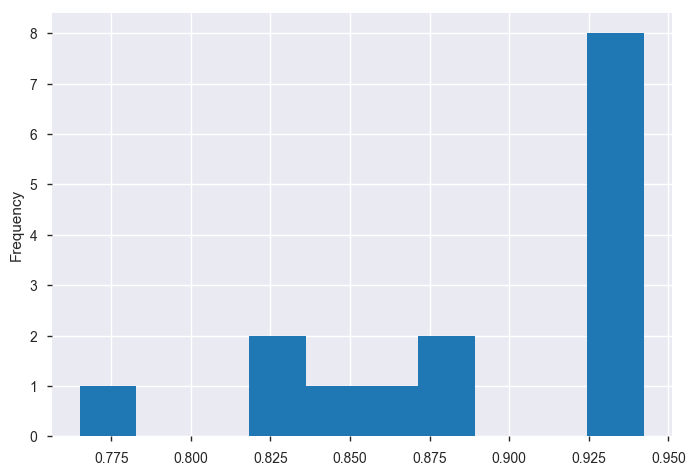

In [6]:
df.accuracy.plot.hist()

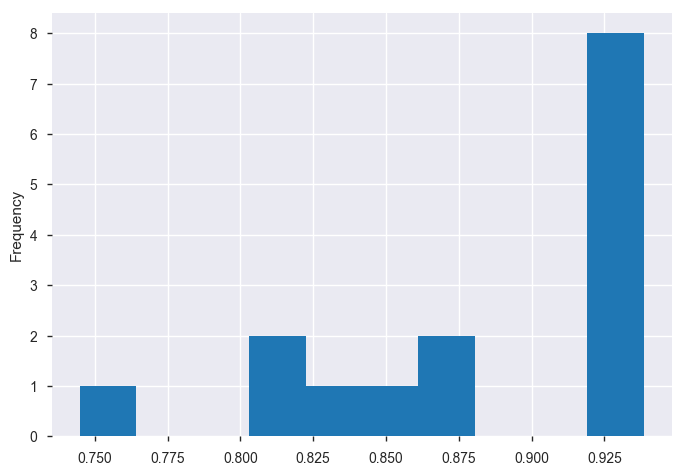

In [7]:
df.f1_macro.plot.hist()

In [8]:
labels = df.source.unique()

In [9]:
stats = df.f1_macro.values * 100
statsBalanced = df2.f1_macro.values * 100

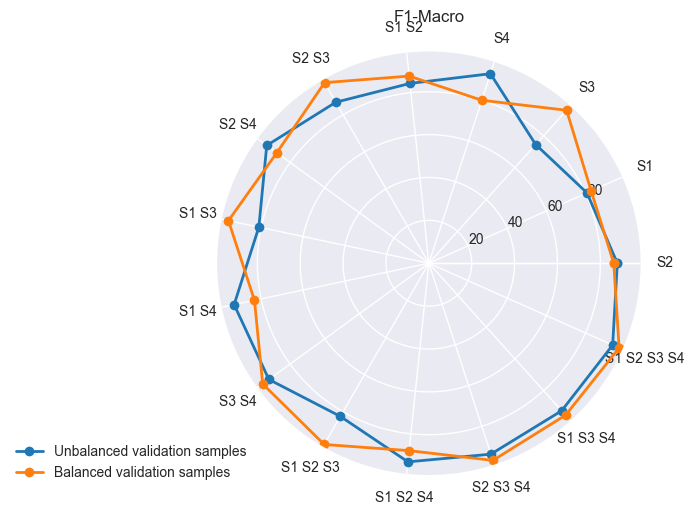

In [10]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False) # Set the angle
# close the plot
stats=np.concatenate((stats,[stats[0]]))  # Closed
statsBalanced=np.concatenate((statsBalanced,[statsBalanced[0]]))  # Closed
angles=np.concatenate((angles,[angles[0]]))  # Closed
fig=plt.figure()

ax = fig.add_subplot(111, polar=True)   # Set polar axis
ax.plot(angles, stats, 'o-', linewidth=2,  label="Unbalanced validation samples")  # Draw the plot (or the frame on the radar chart)
ax.fill(angles, stats, alpha=0.0, facecolor='r')  #Fulfill the area
ax.set_thetagrids(angles * 180/np.pi, labels)  # Set the label for each axis
ax.set_title('F1-Macro')  # Set the pokemon's name as the title
#legend = ax.legend(["Unbalanced", "Balanced"], loc=(0.9, .95), labelspacing=0.1, fontsize='small')

ax2 = fig.add_subplot(111, polar=True)   # Set polar axis
ax2.plot(angles, statsBalanced, 'o-', linewidth=2,  label="Balanced validation samples")  # Draw the plot (or the frame on the radar chart)
ax2.fill(angles, statsBalanced, alpha=0.0)  #Fulfill the area
ax2.set_thetagrids(angles * 180/np.pi, labels)  # Set the label for each axis
#legend2 = ax2.legend(["balanced"], loc=(0.9, .60), labelspacing=0.1, fontsize='small')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

#ax.set_rlim(0,250)
ax.grid(True)
ax2.grid(True)